<a href="https://colab.research.google.com/github/blessondensil294/HR-Analytics-Promotion/blob/master/HR_Analytics_to_Predict_Promotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#                             **HR ANALYTICS**



HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources has been using analytics for years. However, the collection, processing and analysis of data has been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game. Here is an opportunity to try predictive analytics in identifying the employees most likely to get promoted.

## Load the Data

### From Local PC

In [0]:
import numpy as np
import pandas as pd

In [0]:
from google.colab import files
uploaded = files.upload()

Saving HR Test Data.csv to HR Test Data.csv
Saving HR Train Data.csv to HR Train Data.csv


In [0]:
import io
df_Train = pd.read_csv(io.BytesIO(uploaded['HR Train Data.csv']))
df_Test = pd.read_csv(io.BytesIO(uploaded['HR Test Data.csv']))

### From Github

In [0]:
df_Test_url = 'https://github.com/blessondensil294/HR-Analytics-Promotion/blob/master/Data/HR%20Test%20Data.csv'
df_Train_url = 'https://github.com/blessondensil294/HR-Analytics-Promotion/blob/master/Data/HR%20Train%20Data.csv'
df_Train = pd.read_csv('df_Train_url')
df_Test = pd.read_csv('df_Test_url')

FileNotFoundError: ignored

## Exploratory Data Analysis

In [0]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df_Train)
prof.to_file(output_file='output.html')

TypeError: ignored

In [0]:
df_Train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [0]:
df_Train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [0]:
df_Train.shape

(54808, 14)

In [0]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [0]:
df_Train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [0]:
df_Train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [0]:
df_Test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

## Feature Engineering

### Fill Missing Values

In [0]:
df_Train['education'] = df_Train['education'].fillna('Other')
df_Test['education'] = df_Test['education'].fillna('Other')

In [0]:
df_Train['previous_year_rating'] = df_Train['previous_year_rating'].fillna(0)
df_Test['previous_year_rating'] = df_Test['previous_year_rating'].fillna(0)

In [0]:
df_Train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

## Data Insight and Visualization

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df_Train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

Count based on the Promotion

In [0]:
df_Train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

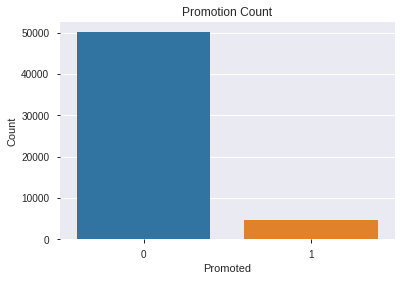

In [0]:
sns.countplot(x='is_promoted', data=df_Train)
plt.xlabel("Promoted")
plt.ylabel("Count")
plt.title("Promotion Count")
plt.show()

Promotion Count based on Department

In [0]:
df_Train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [0]:
grouped = df_Train.groupby(['is_promoted', 'department'])
grouped.size()

is_promoted  department       
0            Analytics             4840
             Finance               2330
             HR                    2282
             Legal                  986
             Operations           10325
             Procurement           6450
             R&D                    930
             Sales & Marketing    15627
             Technology            6370
1            Analytics              512
             Finance                206
             HR                     136
             Legal                   53
             Operations            1023
             Procurement            688
             R&D                     69
             Sales & Marketing     1213
             Technology             768
dtype: int64

In [0]:
Dept_Prom_Table = pd.crosstab(index=df_Train["department"], columns=df_Train["is_promoted"])
Dept_Prom_Table

is_promoted,0,1
department,,
Analytics,4840,512
Finance,2330,206
HR,2282,136
Legal,986,53
Operations,10325,1023
Procurement,6450,688
R&D,930,69
Sales & Marketing,15627,1213
Technology,6370,768


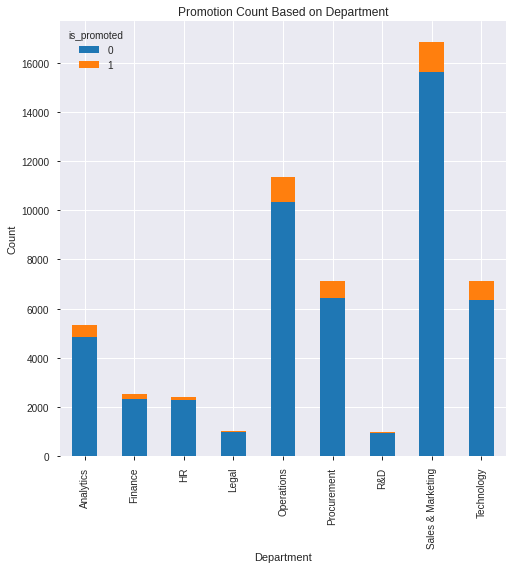

In [0]:
Dept_Prom_Table.plot(kind="bar", figsize=(8,8), stacked=True)
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Promotion Count Based on Department")
plt.show()

## Feature Engineering

### Encoding of Columns

In [0]:
df_Train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


Convert Gender to Label Encoding

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [0]:
df_Train['gender'] = le.fit_transform(df_Train['gender'])
df_Test['gender'] = le.fit_transform(df_Test['gender'])

In [0]:
df_Train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0


Convert the Department to One Hot Encoding

In [0]:
df_Train = pd.get_dummies(df_Train, columns=["department"])
df_Test = pd.get_dummies(df_Test, columns=["department"])
df_Train.head()

,employee_id,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology
0,65438,region_7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,0,1,0
1,65141,region_22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0,0,0,0,0,1,0,0,0,0
2,7513,region_19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,0,1,0
3,2542,region_23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,0,1,0
4,48945,region_26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,0,1


Convert the Region to One Hot Encoding

In [0]:
df_Train = pd.get_dummies(df_Train, columns=["region"])
df_Test = pd.get_dummies(df_Test, columns=["region"])
df_Train.head()

,employee_id,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9
0,65438,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,65141,Bachelor's,1,other,1,30,5.0,4,0,0,60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7513,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2542,Bachelor's,1,other,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,48945,Bachelor's,1,other,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Convert the Education to One Hot Encoding

In [0]:
df_Train = pd.get_dummies(df_Train, columns=["education"])
df_Test = pd.get_dummies(df_Test, columns=["education"])
df_Train.head()

,employee_id,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Other
0,65438,0,sourcing,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,65141,1,other,1,30,5.0,4,0,0,60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,7513,1,sourcing,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2542,1,other,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,48945,1,other,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Convert the Recruitment Channel to One Hot Encoding

In [0]:
df_Train = pd.get_dummies(df_Train, columns=["recruitment_channel"])
df_Test = pd.get_dummies(df_Test, columns=["recruitment_channel"])
df_Train.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Other,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,65141,1,1,30,5.0,4,0,0,60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,7513,1,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,2542,1,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,48945,1,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


Convert the Previous Year Rating to One Hot Encoding

In [0]:
df_Train = pd.get_dummies(df_Train, columns=["previous_year_rating"])
df_Test = pd.get_dummies(df_Test, columns=["previous_year_rating"])
df_Train.head()

,employee_id,gender,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Other,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_0.0,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0
0,65438,0,1,35,8,1,0,49,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,65141,1,1,30,4,0,0,60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,7513,1,1,34,7,0,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,2542,1,2,39,10,0,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,48945,1,1,45,2,0,0,73,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0


### Scaling the Columns

In [0]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()

In [0]:
df_Train[['age']] = mm_scaler.fit_transform(df_Train[['age']])
df_Test[['age']] = mm_scaler.fit_transform(df_Test[['age']])
df_Train.head()

,employee_id,gender,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Other,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_0.0,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0
0,65438,0,1,0.375,8,1,0,49,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,65141,1,1,0.250,4,0,0,60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,7513,1,1,0.350,7,0,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,2542,1,2,0.475,10,0,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,48945,1,1,0.625,2,0,0,73,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0


In [0]:
df_Train[['length_of_service']] = mm_scaler.fit_transform(df_Train[['length_of_service']])
df_Test[['length_of_service']] = mm_scaler.fit_transform(df_Test[['length_of_service']])
df_Train.head()

,employee_id,gender,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Other,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_0.0,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0
0,65438,0,1,0.375,0.194444,1,0,49,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,65141,1,1,0.250,0.083333,0,0,60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,7513,1,1,0.350,0.166667,0,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,2542,1,2,0.475,0.250000,0,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,48945,1,1,0.625,0.027778,0,0,73,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0


In [0]:
df_Train[['avg_training_score']] = mm_scaler.fit_transform(df_Train[['avg_training_score']])
df_Test[['avg_training_score']] = mm_scaler.fit_transform(df_Test[['avg_training_score']])
df_Train.head()

,employee_id,gender,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Other,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_0.0,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0
0,65438,0,1,0.375,0.194444,1,0,0.166667,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,65141,1,1,0.250,0.083333,0,0,0.350000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,7513,1,1,0.350,0.166667,0,0,0.183333,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,2542,1,2,0.475,0.250000,0,0,0.183333,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,48945,1,1,0.625,0.027778,0,0,0.566667,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0


## Feature Selection

### Correlation of the Data

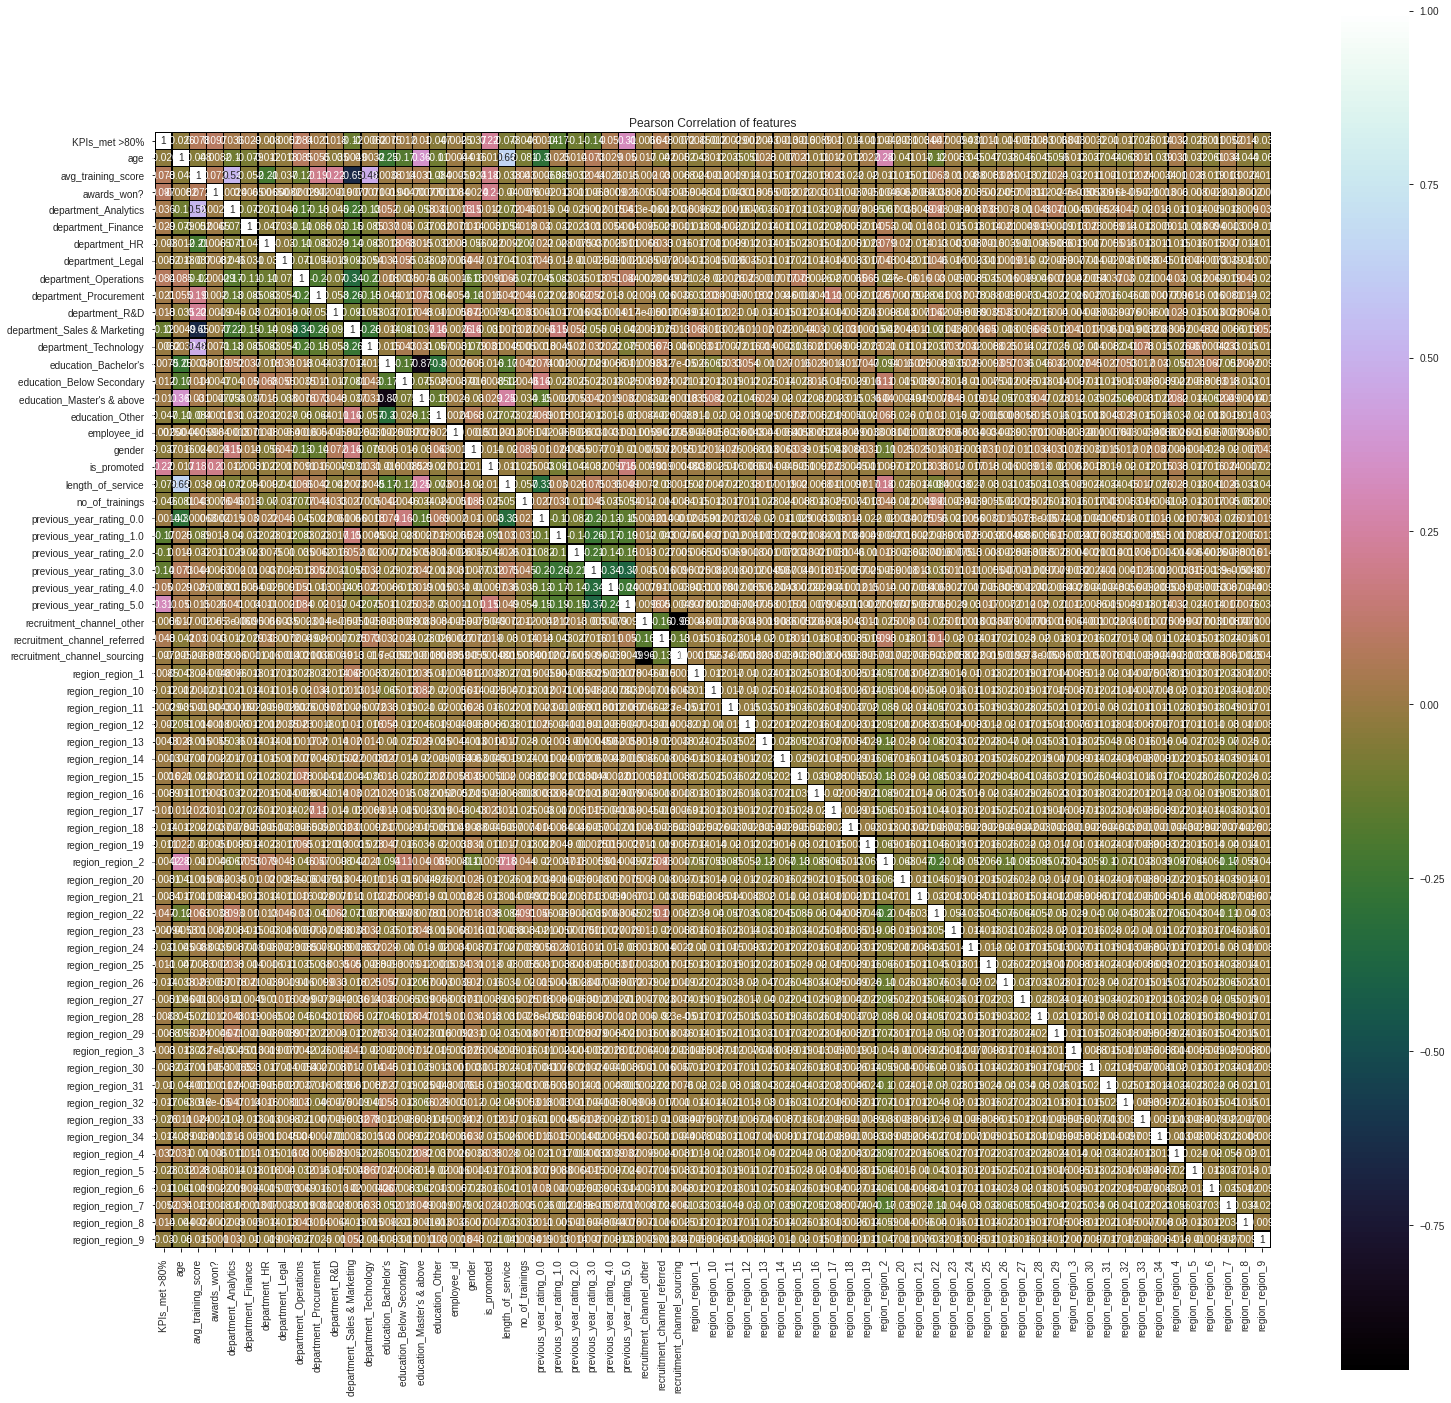

In [0]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df_Train.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df_Train.columns.difference(str_list) 
# Create Dataframe containing only numerical features
train_num = df_Train[num_list]
f, ax = plt.subplots(figsize=(25, 25))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
sns.heatmap(train_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

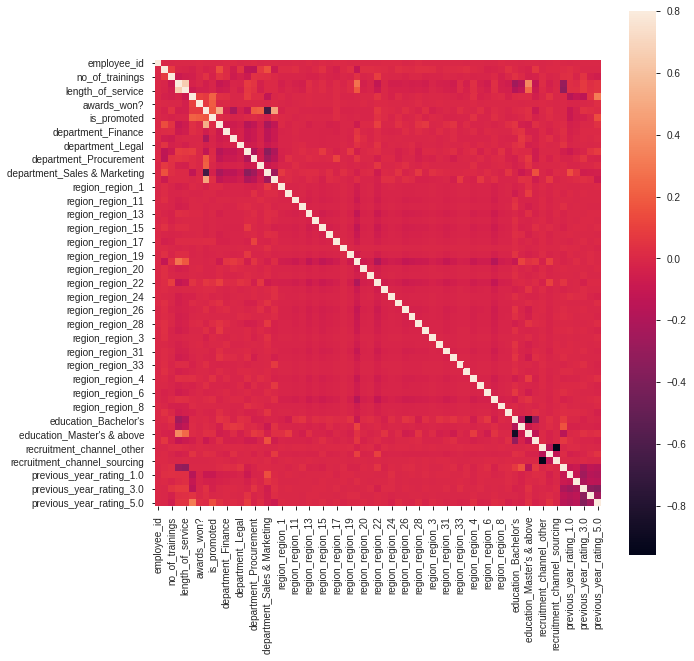

In [0]:
corrmat = df_Train.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, square=True, vmax=.8)

### Multi Colinearity of the Data

In [0]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
df_multi = df_Train
df_multi = df_multi.drop('is_promoted', axis=1)

In [0]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_multi.values, i) for i in range(df_multi.shape[1])]
vif["features"] = df_multi.columns

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [0]:
vif.round(1)

,VIF Factor,features
0,1.0,employee_id
1,1.1,gender
2,1.1,no_of_trainings
3,2.2,age
4,1.8,length_of_service
...,...,...
59,inf,previous_year_rating_1.0
60,inf,previous_year_rating_2.0
61,inf,previous_year_rating_3.0
62,inf,previous_year_rating_4.0


## Data Modelling

### Balance the Data

In [0]:
df_Train.head()

,employee_id,gender,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Other,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_0.0,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0
0,65438,0,1,0.375,0.194444,1,0,0.166667,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,65141,1,1,0.250,0.083333,0,0,0.350000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,7513,1,1,0.350,0.166667,0,0,0.183333,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,2542,1,2,0.475,0.250000,0,0,0.183333,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,48945,1,1,0.625,0.027778,0,0,0.566667,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0


In [0]:
df_Test.head()

,employee_id,gender,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Other,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_0.0,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0
0,8724,1,1,0.100,0.000000,1,0,0.633333,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
1,74430,0,1,0.275,0.121212,0,0,0.200000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
2,72255,1,1,0.275,0.090909,0,0,0.133333,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,38562,0,3,0.275,0.242424,0,0,0.433333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4,64486,1,1,0.250,0.181818,0,0,0.366667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [0]:
df_Train.shape

(54808, 65)

In [0]:
df_Test.shape

(23490, 64)

In [0]:
x = df_Train
x = x.drop(['employee_id'], axis=1)
x = x.drop(['is_promoted'], axis=1)
y = df_Train['is_promoted']

In [0]:
x_pred = df_Test
x_pred = x_pred.drop(['employee_id'], axis=1)

In [0]:
from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler(random_state=294,sampling_strategy='not majority')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
x_sm, y_sm = sm.fit_resample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression 
#logreg = LogisticRegression(penalty='elasticnet', random_state=1, fit_intercept=True, class_weight='balanced', solver='saga', n_jobs=-1, l1_ratio=0.5)
logreg = LogisticRegression(random_state=294, fit_intercept=True, n_jobs=-1)

In [0]:
logreg.fit(x,np.ravel(y))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=294, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(x_pred)

In [0]:
submission_df = pd.DataFrame({'employee_id':df_Test['employee_id'], 'is_promoted':y_pred})

In [0]:
submission_df.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [0]:
submission_df.to_csv('Sample Submission.csv')

Hackathon Score 36

### Support Vector Machine

In [0]:
from sklearn.svm import SVC
#sv = SVC(kernel='poly', C=100, gamma='0.0001')

In [0]:
sv.fit(x, np.ravel(y))

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = sv.predict(x_pred)

In [0]:
submission_df = pd.DataFrame({'employee_id':df_Test['employee_id'], 'is_promoted':y_pred})
submission_df.to_csv('Sample Submission.csv', index=False)

In [0]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel':['rbf', 'poly', 'sigmoid']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2) 
grid.fit(x,y)

In [0]:
print(grid.best_estimator_)

Hackathon Score 26

### Neural Network

In [0]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [0]:
x.shape

(54808, 63)

In [0]:
y.shape
y = y.reshape(54808,1)

AttributeError: ignored

In [0]:
model = Sequential()

model.add(Dense(30, input_shape=(63,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(15))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(7))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))

model.compile(loss='binary_crossentropy', metric=['accuracy'], optimizer='adam')


In [0]:
history = model.fit(x, np.ravel(y), batch_size=1000, epochs=10, verbose=2)

ValueError: ignored